# About Dataset
---
- RowNumber—corresponds to the record (row) number and has no effect on the output.

- CustomerId—contains random values and has no effect on customer leaving the bank.

- Surname—the surname of a customer has no impact on their decision to leave the bank.

- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

- Geography—a customer’s location can affect their decision to leave the bank.

- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

- NumOfProducts—refers to the number of products that a customer has purchased through the bank.

- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

- IsActiveMember—active customers are less likely to leave the bank.

- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

- Exited—whether or not the customer left the bank.

- Complain—customer has complaint or not.

- Satisfaction Score—Score provided by the customer for their complaint resolution.

- Card Type—type of card hold by the customer.

- Points Earned—the points earned by the customer for using credit card.

Link to Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

<img src="https://github.com/Kodchalerk/PythonProject-CustomerChurnAnalysis/blob/main/Customer-Churn.png?raw=True" alt="Drawing" style="width: 1000px;"/>

**Introduction**

It is much more expensive to sign in a new client than keeping an existing one.

Thus, it is advantageous for banks to know what leads a client towards the decision to leave the company and churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

So, this notebook aims to find out what factors contribute to the probability of churn in customers by using predictive model.

**Quick summary**

- Complain is the most important factor that causes customer to churn and we might say that the customer who possesses the following traits: complain, old age, and is not an active member is more likely to churn.

- The other traits of customers which are not mentioned above has low prediction power which means they are not important in prediction whether customers will churn or not.


# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_rows',50)
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

# Data Cleaning
---

## Data Cleaning process summary
---
- In this dataset,there is no presence of null values and duplicated values.

- The data type for each columns are correctly classified.

- The column named rownumber was eliminated in this process.

- In terms of data integrity, all values are correct and consistent.

- There is no anomaly in both categorical data and numerical data. The continuous features such as, creditscore, age, balance are symmetrical while estimatedsalary and point_earned are evenly distributed.

In [2]:
df = pd.read_csv('https://github.com/Kodchalerk/PythonProject-CustomerChurnAnalysis/blob/main/Customer-Churn-Records.csv?raw=True')
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
0              464  
1              456  
2              377  
3              350  
4              425  
...            ...  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911  

[10000 rows x 18 columns]

In [3]:
# Change name of columns for consistency
df.columns = [i.lower().replace(' ','_') for i in df.columns]

In [4]:
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited', 'complain',
       'satisfaction_score', 'card_type', 'point_earned'],
      dtype='object')

In [5]:
# Check duplicate values
df.duplicated().sum()

0

In [6]:
# Drop unnecessary columns
df = df.drop(columns = ['rownumber','customerid'])

In [7]:
# View dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surname             10000 non-null  object 
 1   creditscore         10000 non-null  int64  
 2   geography           10000 non-null  object 
 3   gender              10000 non-null  object 
 4   age                 10000 non-null  int64  
 5   tenure              10000 non-null  int64  
 6   balance             10000 non-null  float64
 7   numofproducts       10000 non-null  int64  
 8   hascrcard           10000 non-null  int64  
 9   isactivemember      10000 non-null  int64  
 10  estimatedsalary     10000 non-null  float64
 11  exited              10000 non-null  int64  
 12  complain            10000 non-null  int64  
 13  satisfaction_score  10000 non-null  int64  
 14  card_type           10000 non-null  object 
 15  point_earned        10000 non-null  int64  
dtypes: fl

In [8]:
# Check null values
df.isnull().sum()

surname               0
creditscore           0
geography             0
gender                0
age                   0
tenure                0
balance               0
numofproducts         0
hascrcard             0
isactivemember        0
estimatedsalary       0
exited                0
complain              0
satisfaction_score    0
card_type             0
point_earned          0
dtype: int64

- The data is fairly cleaned, no duplicated and null values detected

In [9]:
df.sample(10)

surname  creditscore geography  gender  age  tenure    balance  \
3532      Norton          778   Germany  Female   37       0  105617.73   
2841      Curnow          801    France    Male   38       5       0.00   
500     Chizuoke          555     Spain    Male   32       4       0.00   
211          Tan          603    France    Male   31       8       0.00   
7186      Arnold          653    France    Male   44       8       0.00   
5876   Humphries          704    France    Male   39       2  111525.02   
9975       Smith          610   Germany    Male   50       1  113957.01   
3799  Chinagorom          458     Spain  Female   35       5  166492.48   
631    Pickering          583   Germany  Female   54       6  115988.86   
5518     Farrell          628    France    Male   39       6       0.00   

      numofproducts  hascrcard  isactivemember  estimatedsalary  exited  \
3532              2          1               1        133699.82       1   
2841              2          1               0         66256.27       0   
500               2          1               1         54405.79       0   
211               2          1               1        169915.02       0   
7186              2          1               1        154639.72       0   
5876              1          1               0        199484.96       0   
9975              2          1               0        196526.55       1   
3799              1          1               0        135287.74       0   
631               1          1               0         57553.98       1   
5518              2          0               0        134441.60       0   

      complain  satisfaction_score card_type  point_earned  
3532         1                   1      GOLD           607  
2841         0                   3  PLATINUM           940  
500          0                   4   DIAMOND           850  
211          0                   3      GOLD           245  
7186         0                   3  PLATINUM           382  
5876         0                   4    SILVER           368  
9975         1                   4    SILVER           264  
3799         0                   3    SILVER           603  
631          1                   5   DIAMOND           878  
5518         0                   3  PLATINUM           887

In [10]:
# Check data integrity
col_cat = df.select_dtypes('object')
col_cat = col_cat[['geography','gender','card_type']]
num_col = df.select_dtypes(['int64','float64'])                

In [11]:
for i in col_cat:
    print('**************')
    print(df[i].unique())
    print('**************')
    print(df[i].nunique())
    print('**************')

**************
['France' 'Spain' 'Germany']
**************
3
**************
**************
['Female' 'Male']
**************
2
**************
**************
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
**************
4
**************


In [12]:
for i in num_col:
    print('**************')
    print('Unique values of {}'.format(i))
    print(df[i].unique())
    print('**************')
    print('Number of unique values of {}'.format(i))
    print(df[i].nunique())
    print('**************')

**************
Unique values of creditscore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 61

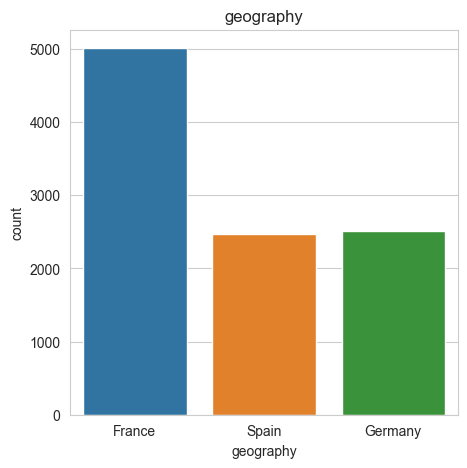

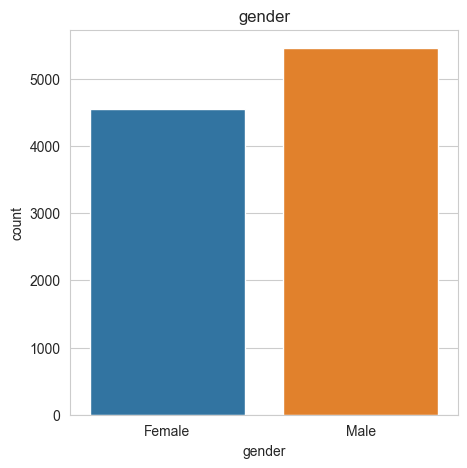

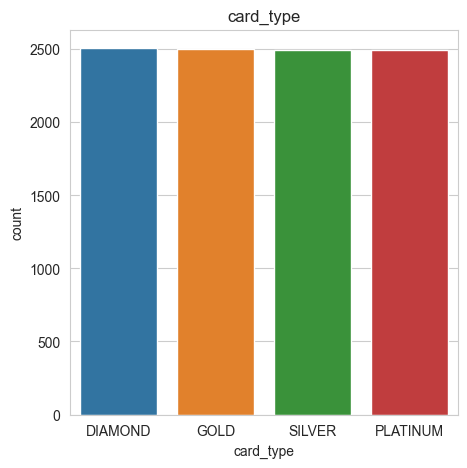

In [13]:
# Quick plot to see the overall values of data
## Categorical columns
for i in col_cat:
    plt.figure(figsize = (5,5))
    sns.countplot(df, x = i)
    plt.title(i)
    plt.show()

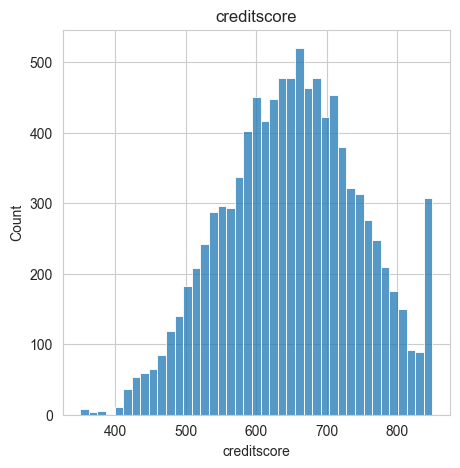

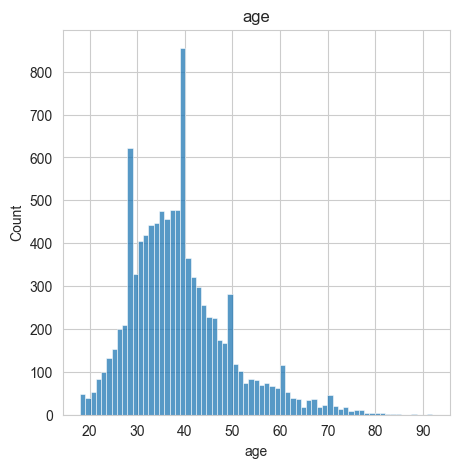

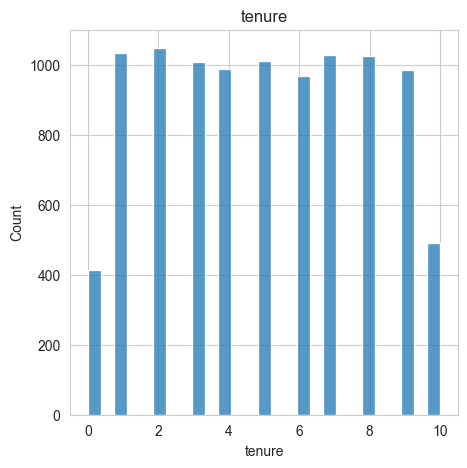

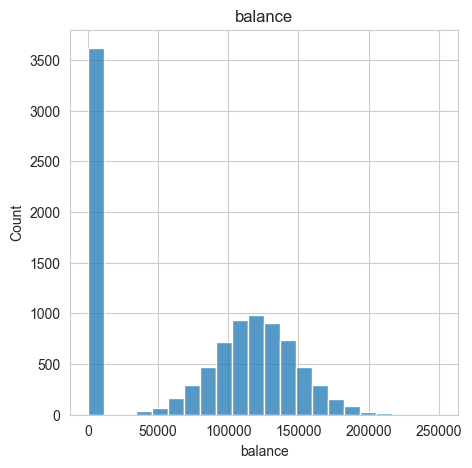

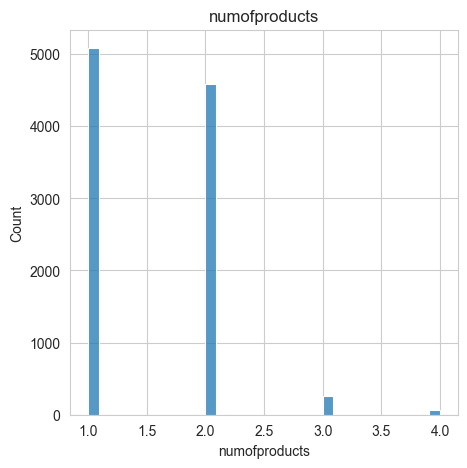

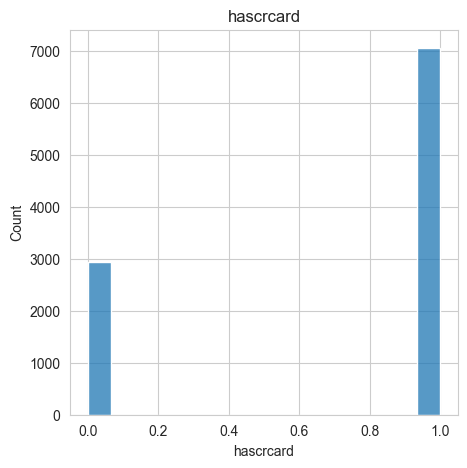

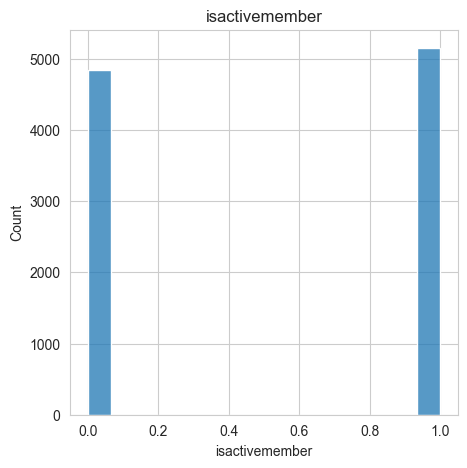

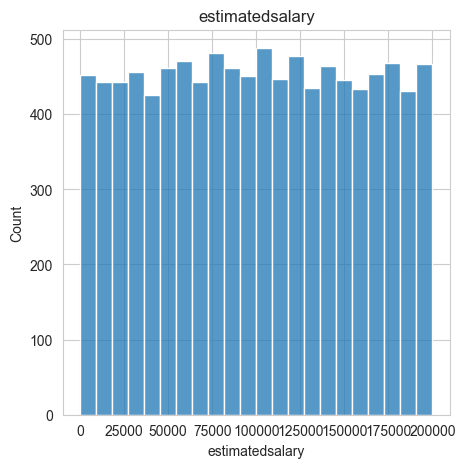

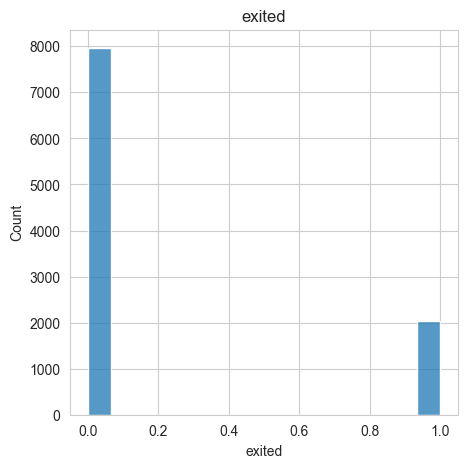

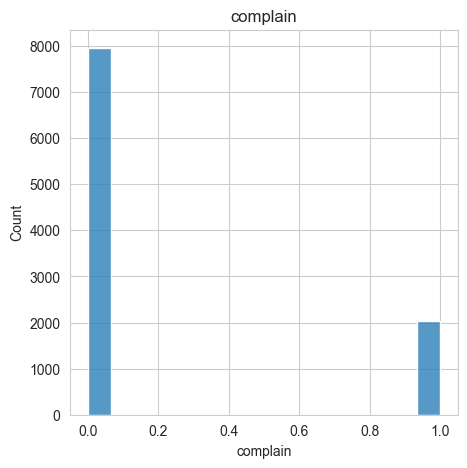

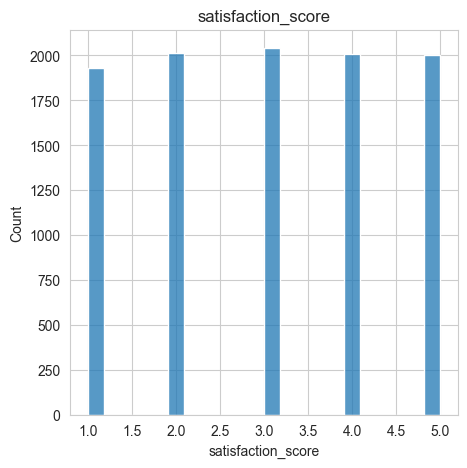

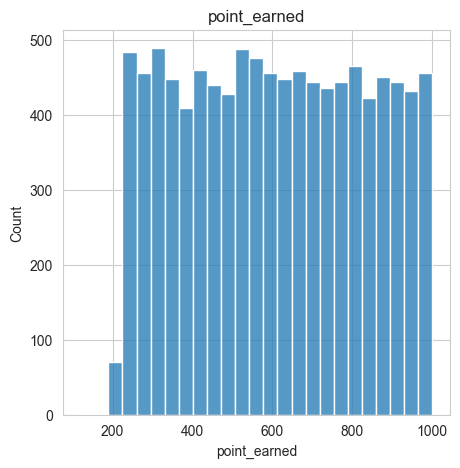

In [14]:
## Numerical columns
for i in num_col:
    plt.figure(figsize = (5,5))
    sns.histplot(df, x = i)
    plt.title(i)
    plt.show()

- At this point, there is no inconsistency in both numerical and categorical columns.

# Exploratory Data Analysis
---

In [15]:
df

surname  creditscore geography  gender  age  tenure    balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      numofproducts  hascrcard  isactivemember  estimatedsalary  exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      complain  satisfaction_score card_type  point_earned  
0            1                   2   DIAMOND           464  
1            1                   3   DIAMOND           456  
2            1                   3   DIAMOND           377  
3            0                   5      GOLD           350  
4            0                   5      GOLD           425  
...        ...                 ...       ...           ...  
9995         0                   1   DIAMOND           300  
9996         0                   5  PLATINUM           771  
9997         1                   3    SILVER           564  
9998         1                   2      GOLD           339  
9999         0                   3   DIAMOND           911  

[10000 rows x 16 columns]

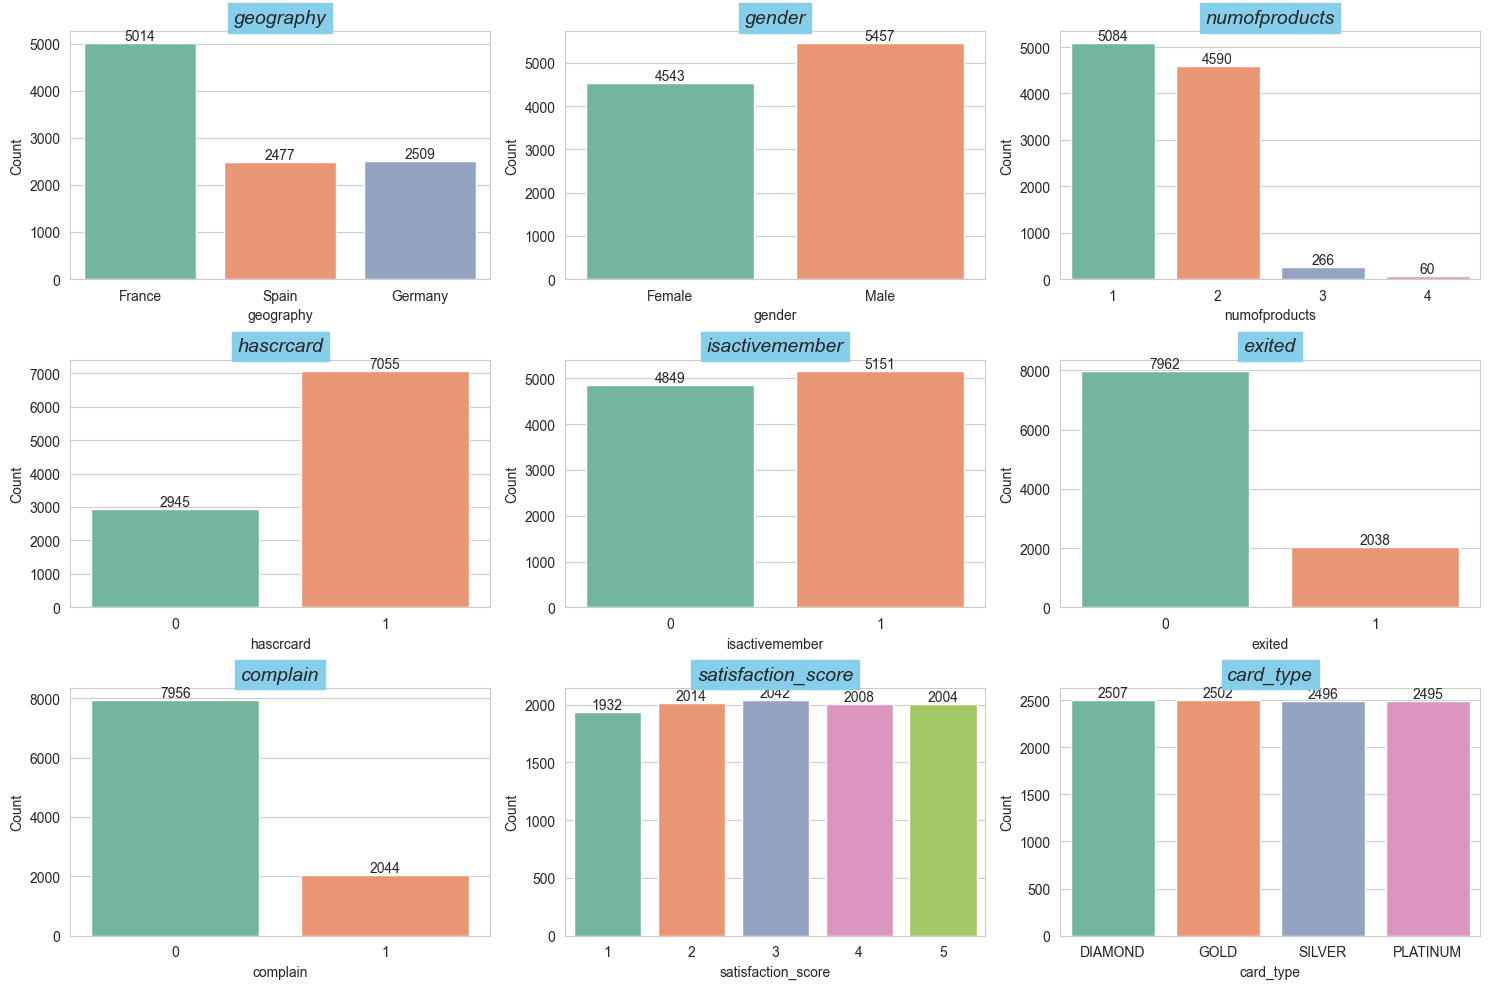

In [16]:
# Take a quick look at categorical features and feature with discrete values
feature = ['geography', 'gender', 'numofproducts', 'hascrcard', 'isactivemember', 'exited', 'complain', 'satisfaction_score', 'card_type']

fig = plt.figure(figsize = (15,10))

for i,j in enumerate(feature):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.countplot(df , x = j , palette = sns.color_palette("Set2"))
    ax.set_title(j , fontsize = 14 , style = 'italic', backgroundcolor = 'skyblue')
    ax.set_ylabel('Count')
    ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()    
plt.show()    

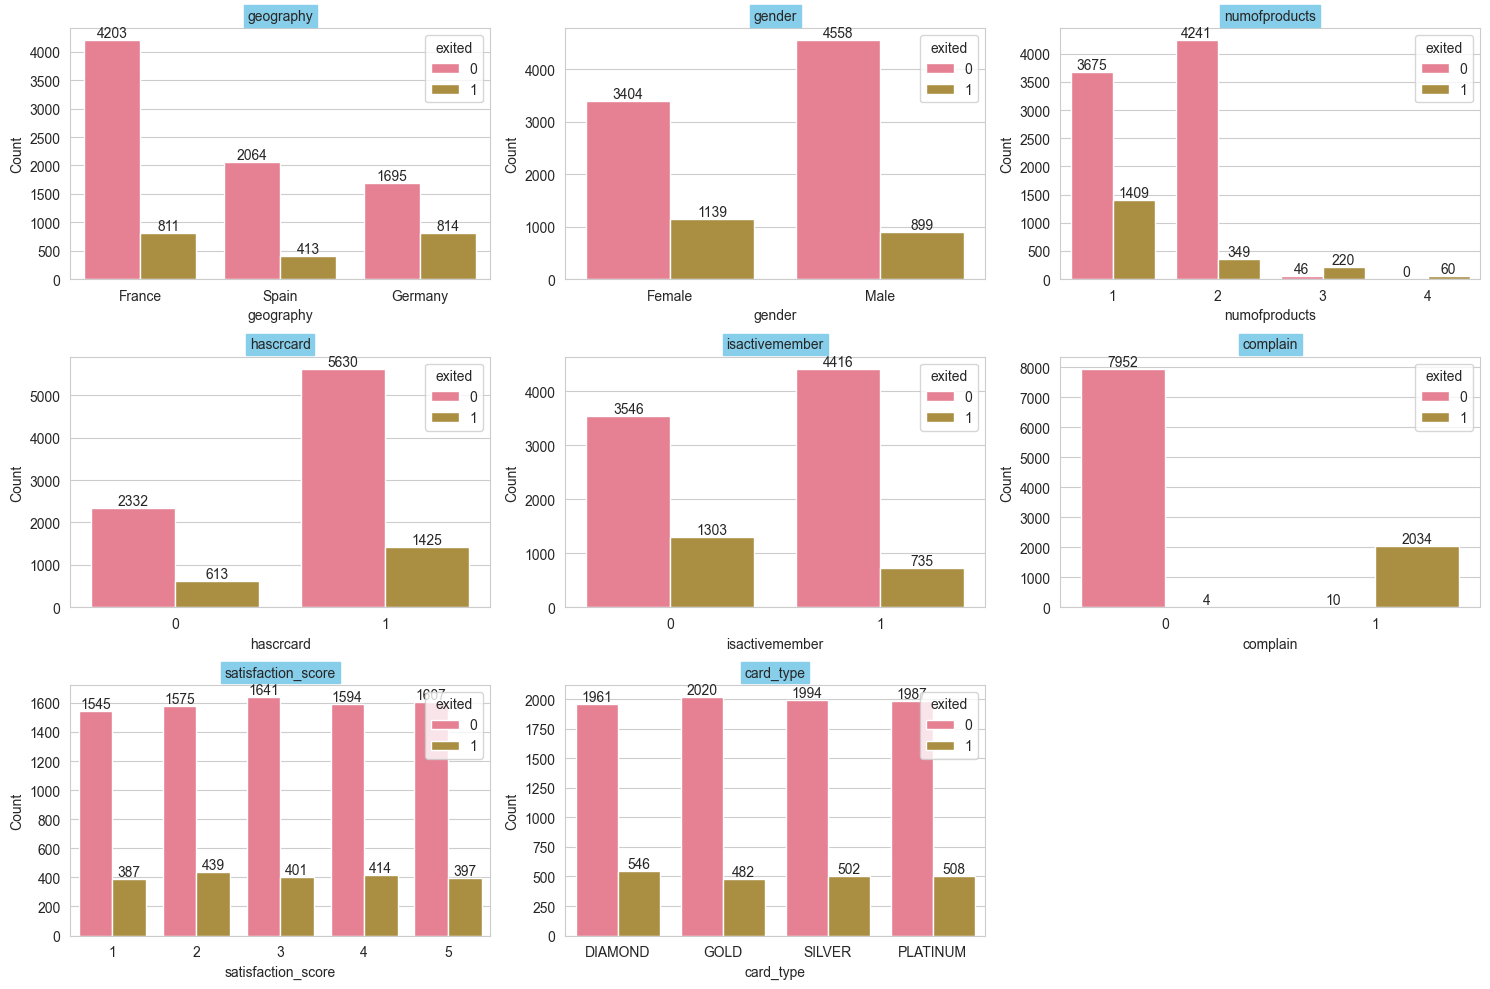

In [17]:
# Take a quick look at some features by churn
# 0 means not change and 1 means change
feature = ['geography', 'gender', 'numofproducts', 'hascrcard', 'isactivemember', 'complain', 'satisfaction_score', 'card_type']

fig = plt.figure(figsize = (15,10))

for i,j in enumerate(feature):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.countplot(df , x = j , hue = 'exited' , palette = sns.color_palette('husl') )
    ax.set_title(j , fontsize = 15 , style = 'italic' , backgroundcolor = 'skyblue', font = 'Arial')
    ax.set_ylabel('Count')
    ax.bar_label(ax.containers[0],label_type='edge')
    ax.bar_label(ax.containers[1],label_type='edge')
plt.tight_layout()    
plt.show()    

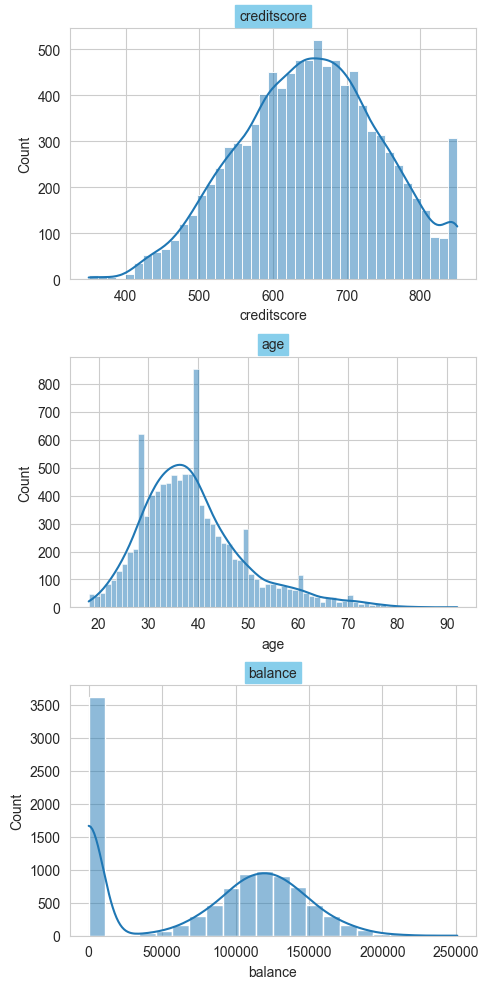

In [18]:
# Take a look at continous features
feat = ['creditscore','age','balance']

fig = plt.figure(figsize = (5,10))

for i,j in enumerate(feat):
    ax = fig.add_subplot(3,1,i+1)
    ax = sns.histplot(df, x = j ,kde = True, palette = 'pastel')
    ax.set_title(j , fontsize = 15 , style = 'italic' , backgroundcolor = 'skyblue', font = 'Arial')
    ax.set_ylabel('Count')
    
plt.tight_layout()      
plt.show()    

# Feature engineering
---

## Encoding data

- In this process, geography, gender, and card_type will be encoded with One-hot encoding method . In addition, surname column will be removed.

In [19]:
df

surname  creditscore geography  gender  age  tenure    balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      numofproducts  hascrcard  isactivemember  estimatedsalary  exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      complain  satisfaction_score card_type  point_earned  
0            1                   2   DIAMOND           464  
1            1                   3   DIAMOND           456  
2            1                   3   DIAMOND           377  
3            0                   5      GOLD           350  
4            0                   5      GOLD           425  
...        ...                 ...       ...           ...  
9995         0                   1   DIAMOND           300  
9996         0                   5  PLATINUM           771  
9997         1                   3    SILVER           564  
9998         1                   2      GOLD           339  
9999         0                   3   DIAMOND           911  

[10000 rows x 16 columns]

In [20]:
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
# Geography
df = pd.get_dummies(df, columns = ['geography'],drop_first = False)

In [22]:
# Gender
df['gender'] = df['gender'].map({'Male': 0 , 'Female' : 1})

In [23]:
# Card type
df = pd.get_dummies(df, columns = ['card_type'] , drop_first = True)

In [24]:
# Drop unused columns
df = df.drop(columns = ['surname'])

In [25]:
df

creditscore  gender  age  tenure    balance  numofproducts  hascrcard  \
0             619       1   42       2       0.00              1          1   
1             608       1   41       1   83807.86              1          0   
2             502       1   42       8  159660.80              3          1   
3             699       1   39       1       0.00              2          0   
4             850       1   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       0   39       5       0.00              2          1   
9996          516       0   35      10   57369.61              1          1   
9997          709       1   36       7       0.00              1          0   
9998          772       0   42       3   75075.31              2          1   
9999          792       1   28       4  130142.79              1          1   

      isactivemember  estimatedsalary  exited  complain  satisfaction_score  \
0                  1        101348.88       1         1                   2   
1                  1        112542.58       0         1                   3   
2                  0        113931.57       1         1                   3   
3                  0         93826.63       0         0                   5   
4                  1         79084.10       0         0                   5   
...              ...              ...     ...       ...                 ...   
9995               0         96270.64       0         0                   1   
9996               1        101699.77       0         0                   5   
9997               1         42085.58       1         1                   3   
9998               0         92888.52       1         1                   2   
9999               0         38190.78       0         0                   3   

      point_earned  geography_France  geography_Germany  geography_Spain  \
0              464                 1                  0                0   
1              456                 0                  0                1   
2              377                 1                  0                0   
3              350                 1                  0                0   
4              425                 0                  0                1   
...            ...               ...                ...              ...   
9995           300                 1                  0                0   
9996           771                 1                  0                0   
9997           564                 1                  0                0   
9998           339                 0                  1                0   
9999           911                 1                  0                0   

      card_type_GOLD  card_type_PLATINUM  card_type_SILVER  
0                  0                   0                 0  
1                  0                   0                 0  
2                  0                   0                 0  
3                  1                   0                 0  
4                  1                   0                 0  
...              ...                 ...               ...  
9995               0                   0                 0  
9996               0                   1                 0  
9997               0                   0                 1  
9998               1                   0                 0  
9999               0                   0                 0  

[10000 rows x 19 columns]

## Dealing with outliers
---

- Outliers present only in age column. These outliers were removed and the the number of remaining rows are 9,627 from 10,000

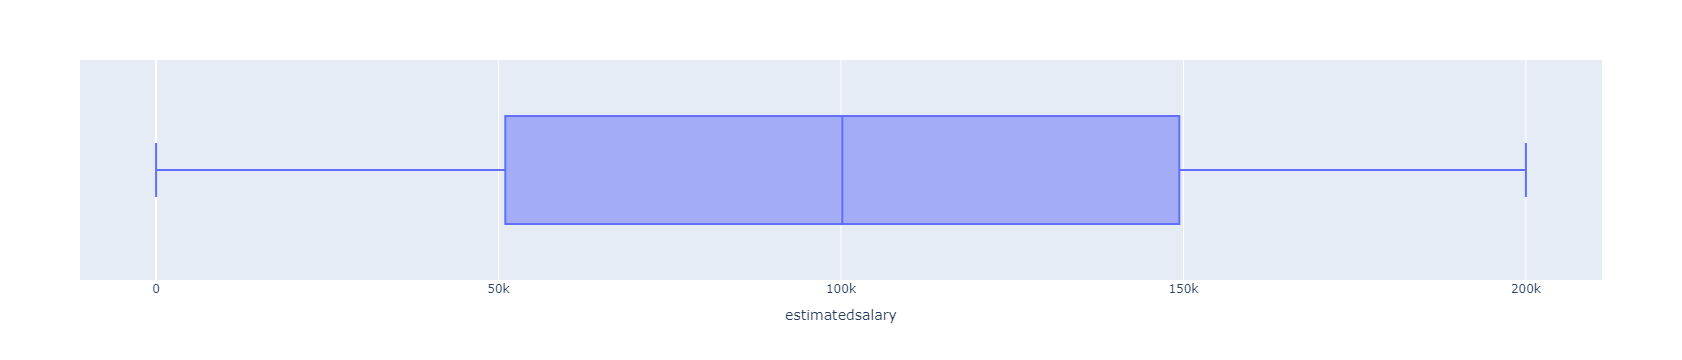

In [26]:
# Check outliers
px.box(df, x = 'estimatedsalary')

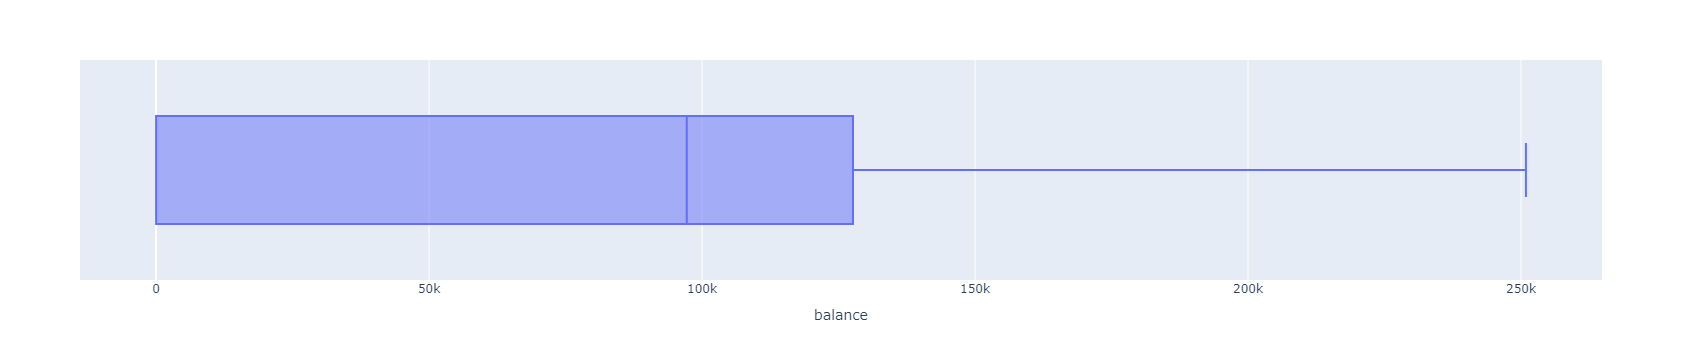

In [27]:
px.box(df, x = 'balance')

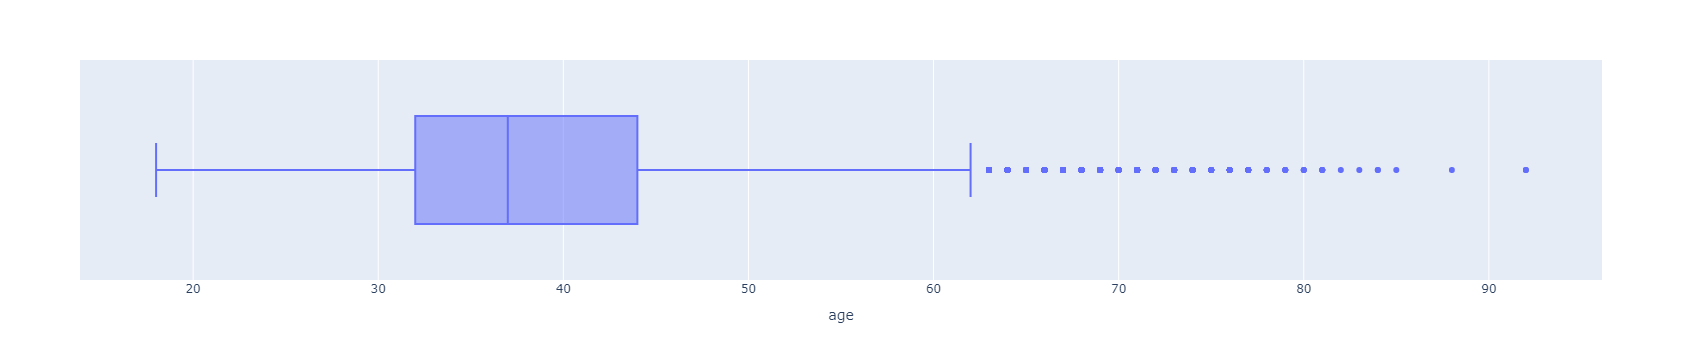

In [28]:
px.box(df,x = 'age')

In [29]:
df = df[(df['age'] <= 62)]

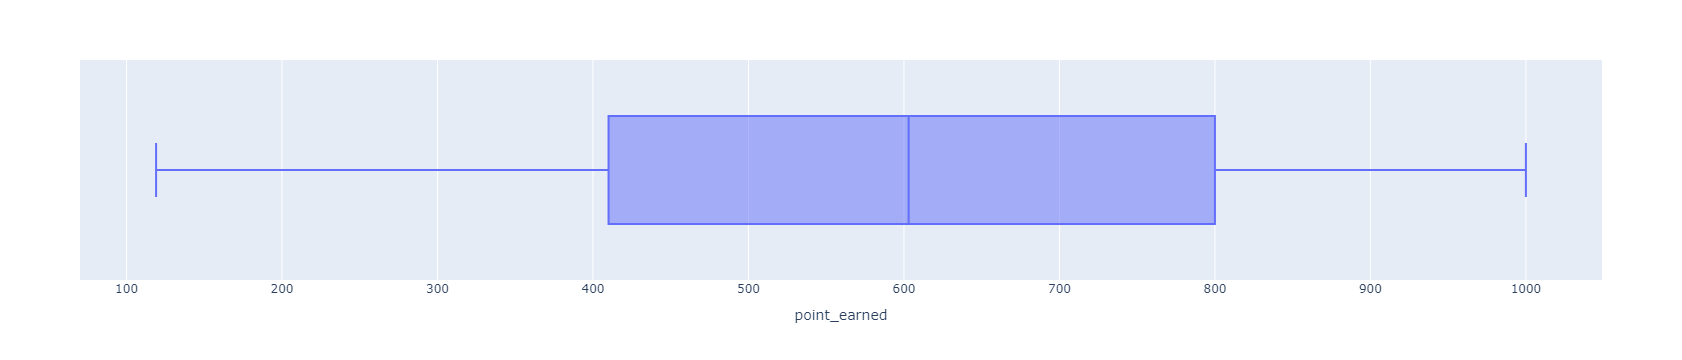

In [30]:
px.box(df,x = 'point_earned')

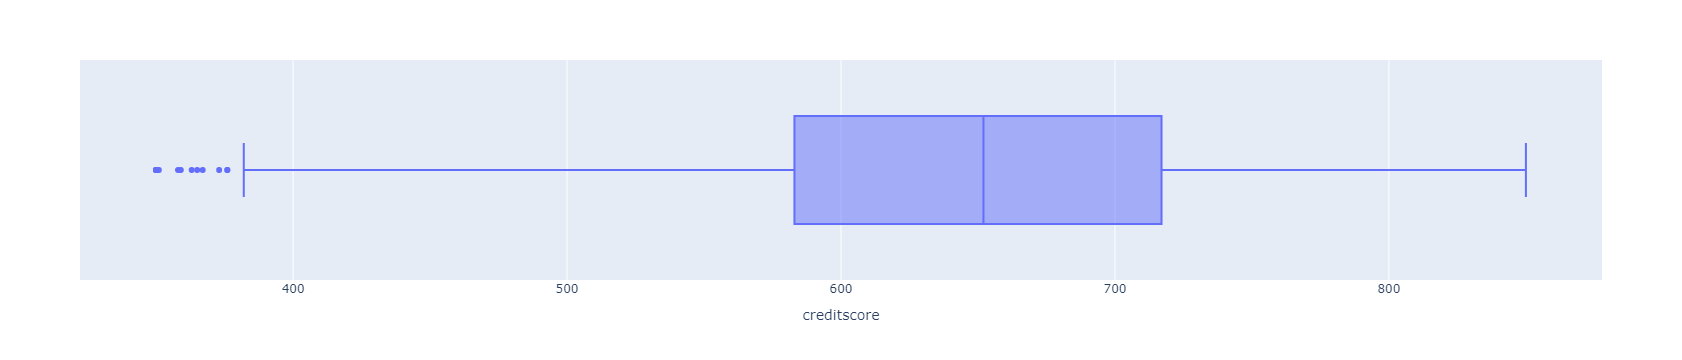

In [31]:
px.box(df, x = 'creditscore')

In [32]:
df = df[(df['creditscore'] >= 382)]

In [33]:
df.shape

(9627, 19)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9627 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   creditscore         9627 non-null   int64  
 1   gender              9627 non-null   int64  
 2   age                 9627 non-null   int64  
 3   tenure              9627 non-null   int64  
 4   balance             9627 non-null   float64
 5   numofproducts       9627 non-null   int64  
 6   hascrcard           9627 non-null   int64  
 7   isactivemember      9627 non-null   int64  
 8   estimatedsalary     9627 non-null   float64
 9   exited              9627 non-null   int64  
 10  complain            9627 non-null   int64  
 11  satisfaction_score  9627 non-null   int64  
 12  point_earned        9627 non-null   int64  
 13  geography_France    9627 non-null   uint8  
 14  geography_Germany   9627 non-null   uint8  
 15  geography_Spain     9627 non-null   uint8  
 16  card_t

In [35]:
# Rearrange columns
cols = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts',
        'estimatedsalary', 'point_earned','satisfaction_score','complain','hascrcard', 'isactivemember','geography_France', 'geography_Germany',
       'geography_Spain', 'card_type_GOLD', 'card_type_PLATINUM',
       'card_type_SILVER','gender','exited']

In [36]:
df = df[cols]

In [37]:
df

creditscore  age  tenure    balance  numofproducts  estimatedsalary  \
0             619   42       2       0.00              1        101348.88   
1             608   41       1   83807.86              1        112542.58   
2             502   42       8  159660.80              3        113931.57   
3             699   39       1       0.00              2         93826.63   
4             850   43       2  125510.82              1         79084.10   
...           ...  ...     ...        ...            ...              ...   
9995          771   39       5       0.00              2         96270.64   
9996          516   35      10   57369.61              1        101699.77   
9997          709   36       7       0.00              1         42085.58   
9998          772   42       3   75075.31              2         92888.52   
9999          792   28       4  130142.79              1         38190.78   

      point_earned  satisfaction_score  complain  hascrcard  isactivemember  \
0              464                   2         1          1               1   
1              456                   3         1          0               1   
2              377                   3         1          1               0   
3              350                   5         0          0               0   
4              425                   5         0          1               1   
...            ...                 ...       ...        ...             ...   
9995           300                   1         0          1               0   
9996           771                   5         0          1               1   
9997           564                   3         1          0               1   
9998           339                   2         1          1               0   
9999           911                   3         0          1               0   

      geography_France  geography_Germany  geography_Spain  card_type_GOLD  \
0                    1                  0                0               0   
1                    0                  0                1               0   
2                    1                  0                0               0   
3                    1                  0                0               1   
4                    0                  0                1               1   
...                ...                ...              ...             ...   
9995                 1                  0                0               0   
9996                 1                  0                0               0   
9997                 1                  0                0               0   
9998                 0                  1                0               1   
9999                 1                  0                0               0   

      card_type_PLATINUM  card_type_SILVER  gender  exited  
0                      0                 0       1       1  
1                      0                 0       1       0  
2                      0                 0       1       1  
3                      0                 0       1       0  
4                      0                 0       1       0  
...                  ...               ...     ...     ...  
9995                   0                 0       0       0  
9996                   1                 0       0       0  
9997                   0                 1       1       1  
9998                   0                 0       0       1  
9999                   0                 0       1       0  

[9627 rows x 19 columns]

## Train / Test / Split and Balancing target variable
---

In [38]:
df1 = df.copy()

In [39]:
X = df1.iloc[:,0:-1]
X

creditscore  age  tenure    balance  numofproducts  estimatedsalary  \
0             619   42       2       0.00              1        101348.88   
1             608   41       1   83807.86              1        112542.58   
2             502   42       8  159660.80              3        113931.57   
3             699   39       1       0.00              2         93826.63   
4             850   43       2  125510.82              1         79084.10   
...           ...  ...     ...        ...            ...              ...   
9995          771   39       5       0.00              2         96270.64   
9996          516   35      10   57369.61              1        101699.77   
9997          709   36       7       0.00              1         42085.58   
9998          772   42       3   75075.31              2         92888.52   
9999          792   28       4  130142.79              1         38190.78   

      point_earned  satisfaction_score  complain  hascrcard  isactivemember  \
0              464                   2         1          1               1   
1              456                   3         1          0               1   
2              377                   3         1          1               0   
3              350                   5         0          0               0   
4              425                   5         0          1               1   
...            ...                 ...       ...        ...             ...   
9995           300                   1         0          1               0   
9996           771                   5         0          1               1   
9997           564                   3         1          0               1   
9998           339                   2         1          1               0   
9999           911                   3         0          1               0   

      geography_France  geography_Germany  geography_Spain  card_type_GOLD  \
0                    1                  0                0               0   
1                    0                  0                1               0   
2                    1                  0                0               0   
3                    1                  0                0               1   
4                    0                  0                1               1   
...                ...                ...              ...             ...   
9995                 1                  0                0               0   
9996                 1                  0                0               0   
9997                 1                  0                0               0   
9998                 0                  1                0               1   
9999                 1                  0                0               0   

      card_type_PLATINUM  card_type_SILVER  gender  
0                      0                 0       1  
1                      0                 0       1  
2                      0                 0       1  
3                      0                 0       1  
4                      0                 0       1  
...                  ...               ...     ...  
9995                   0                 0       0  
9996                   1                 0       0  
9997                   0                 1       1  
9998                   0                 0       0  
9999                   0                 0       1  

[9627 rows x 18 columns]

In [40]:
y = df1.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: exited, Length: 9627, dtype: int64

In [41]:
# Train/ Test / Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.25 , random_state = 45  )


<Axes: ylabel='exited'>

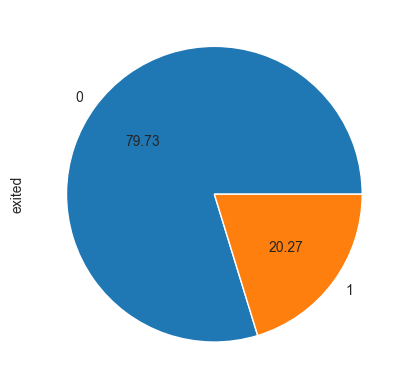

In [42]:
df.exited.value_counts().plot.pie(autopct = '%.2f')

- As we can see, the target variable is imbalance.

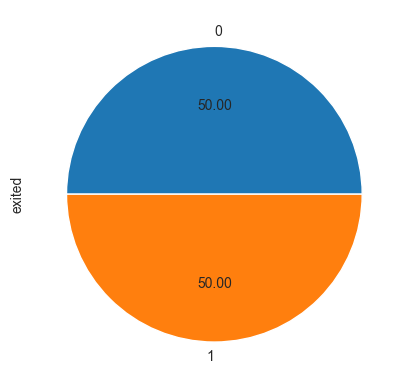

In [43]:
# Implementing Ovesampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 'not majority')
X_train, Y_train = ros.fit_resample(X_train,Y_train)

ax = Y_train.value_counts().plot.pie(autopct = '%.2f')

In [44]:
X_train

creditscore  age  tenure    balance  numofproducts  estimatedsalary  \
0              635   47       2  125724.95              2         63236.97   
1              720   29       7  106230.92              1         69903.93   
2              693   38       7  198338.77              2         14278.18   
3              781   42       3  156555.54              1        175674.01   
4              657   37       6   95845.60              1        122218.23   
...            ...  ...     ...        ...            ...              ...   
11577          553   46       3   82291.10              1        112549.99   
11578          564   33       2  115761.51              1        112350.21   
11579          623   46       4       0.00              1          5549.11   
11580          698   50       1       0.00              4         88566.90   
11581          754   61       5  146622.35              1         41815.22   

       point_earned  satisfaction_score  complain  hascrcard  isactivemember  \
0               773                   5         0          1               0   
1               747                   1         1          1               1   
2               991                   5         0          1               1   
3               977                   3         0          1               1   
4               517                   5         0          1               0   
...             ...                 ...       ...        ...             ...   
11577           880                   1         1          1               0   
11578           792                   2         1          0               1   
11579           598                   3         1          1               0   
11580           341                   3         1          1               0   
11581           687                   4         1          1               1   

       geography_France  geography_Germany  geography_Spain  card_type_GOLD  \
0                     1                  0                0               0   
1                     0                  1                0               0   
2                     1                  0                0               0   
3                     1                  0                0               0   
4                     1                  0                0               1   
...                 ...                ...              ...             ...   
11577                 0                  1                0               0   
11578                 0                  1                0               0   
11579                 0                  0                1               0   
11580                 0                  0                1               0   
11581                 1                  0                0               0   

       card_type_PLATINUM  card_type_SILVER  gender  
0                       1                 0       1  
1                       0                 1       1  
2                       0                 0       0  
3                       0                 0       1  
4                       0                 0       1  
...                   ...               ...     ...  
11577                   0                 0       0  
11578                   1                 0       1  
11579                   0                 0       0  
11580                   1                 0       1  
11581                   0                 0       0  

[11582 rows x 18 columns]

In [45]:
X_test

creditscore  age  tenure    balance  numofproducts  estimatedsalary  \
184           804   50       4       0.00              1          8546.87   
4338          714   25       2       0.00              1        132979.43   
741           546   24       8  156325.38              1        125381.02   
6079          609   31       9  103837.75              1        150218.11   
6214          458   35       9  146780.52              2          3476.38   
...           ...  ...     ...        ...            ...              ...   
968           544   37       3   84496.71              1         79972.09   
3425          769   43       4  110182.54              2         87537.32   
8318          520   39       6  145644.05              1        104118.93   
8297          584   35       2  114321.28              2         15959.01   
4274          502   42       0  132002.70              1         28204.98   

      point_earned  satisfaction_score  complain  hascrcard  isactivemember  \
184            482                   2         1          1               1   
4338           484                   3         0          1               1   
741            494                   2         0          1               1   
6079           718                   2         0          1               1   
6214           784                   3         0          1               1   
...            ...                 ...       ...        ...             ...   
968            939                   5         0          0               0   
3425           505                   2         0          1               1   
8318           467                   3         0          0               0   
8297           855                   3         0          0               0   
4274           403                   3         1          0               1   

      geography_France  geography_Germany  geography_Spain  card_type_GOLD  \
184                  1                  0                0               1   
4338                 0                  0                1               0   
741                  1                  0                0               0   
6079                 0                  1                0               0   
6214                 0                  1                0               0   
...                ...                ...              ...             ...   
968                  1                  0                0               0   
3425                 0                  1                0               0   
8318                 1                  0                0               0   
8297                 1                  0                0               0   
4274                 0                  1                0               0   

      card_type_PLATINUM  card_type_SILVER  gender  
184                    0                 0       1  
4338                   0                 0       0  
741                    0                 0       0  
6079                   0                 1       0  
6214                   1                 0       0  
...                  ...               ...     ...  
968                    1                 0       0  
3425                   1                 0       0  
8318                   1                 0       1  
8297                   0                 0       1  
4274                   0                 1       1  

[2407 rows x 18 columns]

In [46]:
Y_train.value_counts()

0    5791
1    5791
Name: exited, dtype: int64

In [47]:
Y_test.value_counts()

0    1885
1     522
Name: exited, dtype: int64

## Feature Selection
---

### Feature Selection summary
In this processs, the following columns : hascrcard',card_type_GOLD,card_type_PLATINUM',card_type_SILVER were removed.

### Univariate feature selection

In [48]:
# Select categorical columns from X_train
categorical_features = X_train[['complain',
       'hascrcard', 'isactivemember','geography_France','geography_Germany', 'geography_Spain',
       'card_type_GOLD', 'card_type_PLATINUM', 'card_type_SILVER', 'gender']]


In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [50]:
bestfeatures = SelectKBest(score_func = chi2, k = 9)
fit = bestfeatures.fit(categorical_features,Y_train)

In [51]:
dfscores  = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(categorical_features.columns)

In [52]:
featurescores = pd.concat([dfcolumns,dfscores] , axis =1 )
featurescores.columns = ['Spec','Score']

In [53]:
featurescores.sort_values('Score', ascending = False)

Spec        Score
0            complain  5759.024901
4   geography_Germany   302.924195
2      isactivemember   253.432506
3    geography_France   100.109745
9              gender    90.479351
5     geography_Spain    32.817443
7  card_type_PLATINUM     0.433015
8    card_type_SILVER     0.373585
6      card_type_GOLD     0.333102
1           hascrcard     0.151104

- In this step, the **cardtype** and **whether the customers have card or not** seems to be independent from our target variable

### Feature selection with Pearson correlation
---

In [54]:
df2 = df.copy()
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df2.iloc[:,0:7] = scale.fit_transform(df2.iloc[:,0:7])

<Axes: >

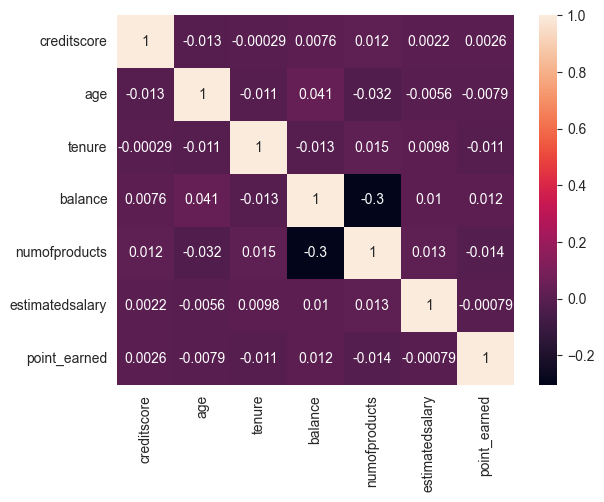

In [55]:

df_corr = df2.iloc[:,0:7].corr()
sns.heatmap(df_corr,annot = True)

- In this step, we decided not to remove any numerical features as they are not highly correlated

### Feature Selection with Feature Importance
---

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model = RandomForestClassifier(n_estimators = 25 , random_state = 45)

In [58]:
model.fit(X,y)

RandomForestClassifier(n_estimators=25, random_state=45)

In [59]:
model.feature_importances_

array([7.32813866e-03, 6.44990317e-02, 3.37966724e-03, 1.15279463e-02,
       4.12554566e-02, 7.85592996e-03, 7.88207313e-03, 2.82054413e-03,
       8.29246771e-01, 5.58410499e-04, 1.00324954e-02, 1.90547084e-03,
       5.40378940e-03, 1.57964815e-03, 6.10736059e-04, 7.10682551e-04,
       6.71431184e-04, 2.73177721e-03])

In [60]:
featureimp = pd.Series(model.feature_importances_ , index = X.columns).sort_values(ascending = True)

<Axes: >

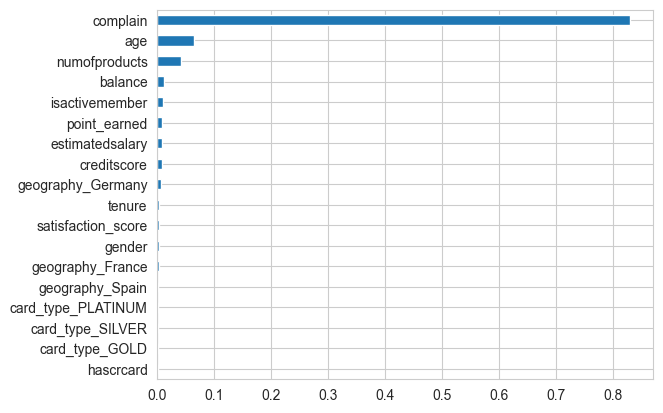

In [61]:
featureimp.plot(kind = 'barh')

- In summary, we decided to remove the following features: hscard and cardtype.

In [62]:
# Remove features in train and test data
X_train.drop(columns = ['hascrcard','card_type_GOLD','card_type_PLATINUM','card_type_SILVER'],inplace = True)
X_test.drop(columns = ['hascrcard','card_type_GOLD','card_type_PLATINUM','card_type_SILVER'],inplace = True)

In [63]:
X_train

creditscore  age  tenure    balance  numofproducts  estimatedsalary  \
0              635   47       2  125724.95              2         63236.97   
1              720   29       7  106230.92              1         69903.93   
2              693   38       7  198338.77              2         14278.18   
3              781   42       3  156555.54              1        175674.01   
4              657   37       6   95845.60              1        122218.23   
...            ...  ...     ...        ...            ...              ...   
11577          553   46       3   82291.10              1        112549.99   
11578          564   33       2  115761.51              1        112350.21   
11579          623   46       4       0.00              1          5549.11   
11580          698   50       1       0.00              4         88566.90   
11581          754   61       5  146622.35              1         41815.22   

       point_earned  satisfaction_score  complain  isactivemember  \
0               773                   5         0               0   
1               747                   1         1               1   
2               991                   5         0               1   
3               977                   3         0               1   
4               517                   5         0               0   
...             ...                 ...       ...             ...   
11577           880                   1         1               0   
11578           792                   2         1               1   
11579           598                   3         1               0   
11580           341                   3         1               0   
11581           687                   4         1               1   

       geography_France  geography_Germany  geography_Spain  gender  
0                     1                  0                0       1  
1                     0                  1                0       1  
2                     1                  0                0       0  
3                     1                  0                0       1  
4                     1                  0                0       1  
...                 ...                ...              ...     ...  
11577                 0                  1                0       0  
11578                 0                  1                0       1  
11579                 0                  0                1       0  
11580                 0                  0                1       1  
11581                 1                  0                0       0  

[11582 rows x 14 columns]

In [64]:
X_test

creditscore  age  tenure    balance  numofproducts  estimatedsalary  \
184           804   50       4       0.00              1          8546.87   
4338          714   25       2       0.00              1        132979.43   
741           546   24       8  156325.38              1        125381.02   
6079          609   31       9  103837.75              1        150218.11   
6214          458   35       9  146780.52              2          3476.38   
...           ...  ...     ...        ...            ...              ...   
968           544   37       3   84496.71              1         79972.09   
3425          769   43       4  110182.54              2         87537.32   
8318          520   39       6  145644.05              1        104118.93   
8297          584   35       2  114321.28              2         15959.01   
4274          502   42       0  132002.70              1         28204.98   

      point_earned  satisfaction_score  complain  isactivemember  \
184            482                   2         1               1   
4338           484                   3         0               1   
741            494                   2         0               1   
6079           718                   2         0               1   
6214           784                   3         0               1   
...            ...                 ...       ...             ...   
968            939                   5         0               0   
3425           505                   2         0               1   
8318           467                   3         0               0   
8297           855                   3         0               0   
4274           403                   3         1               1   

      geography_France  geography_Germany  geography_Spain  gender  
184                  1                  0                0       1  
4338                 0                  0                1       0  
741                  1                  0                0       0  
6079                 0                  1                0       0  
6214                 0                  1                0       0  
...                ...                ...              ...     ...  
968                  1                  0                0       0  
3425                 0                  1                0       0  
8318                 1                  0                0       1  
8297                 1                  0                0       1  
4274                 0                  1                0       1  

[2407 rows x 14 columns]

In [65]:
Y_train

0        0
1        1
2        0
3        0
4        0
        ..
11577    1
11578    1
11579    1
11580    1
11581    1
Name: exited, Length: 11582, dtype: int64

In [66]:
Y_test

184     1
4338    0
741     0
6079    0
6214    0
       ..
968     0
3425    0
8318    0
8297    0
4274    1
Name: exited, Length: 2407, dtype: int64

In [67]:
X_train

creditscore  age  tenure    balance  numofproducts  estimatedsalary  \
0              635   47       2  125724.95              2         63236.97   
1              720   29       7  106230.92              1         69903.93   
2              693   38       7  198338.77              2         14278.18   
3              781   42       3  156555.54              1        175674.01   
4              657   37       6   95845.60              1        122218.23   
...            ...  ...     ...        ...            ...              ...   
11577          553   46       3   82291.10              1        112549.99   
11578          564   33       2  115761.51              1        112350.21   
11579          623   46       4       0.00              1          5549.11   
11580          698   50       1       0.00              4         88566.90   
11581          754   61       5  146622.35              1         41815.22   

       point_earned  satisfaction_score  complain  isactivemember  \
0               773                   5         0               0   
1               747                   1         1               1   
2               991                   5         0               1   
3               977                   3         0               1   
4               517                   5         0               0   
...             ...                 ...       ...             ...   
11577           880                   1         1               0   
11578           792                   2         1               1   
11579           598                   3         1               0   
11580           341                   3         1               0   
11581           687                   4         1               1   

       geography_France  geography_Germany  geography_Spain  gender  
0                     1                  0                0       1  
1                     0                  1                0       1  
2                     1                  0                0       0  
3                     1                  0                0       1  
4                     1                  0                0       1  
...                 ...                ...              ...     ...  
11577                 0                  1                0       0  
11578                 0                  1                0       1  
11579                 0                  0                1       0  
11580                 0                  0                1       1  
11581                 1                  0                0       0  

[11582 rows x 14 columns]

In [68]:
# Apply standard scaler

X_train.iloc[:,0:7] = scale.fit_transform(X_train.iloc[:,0:7])

In [69]:
X_train_scaled = np.array(X_train)

In [70]:
X_test

creditscore  age  tenure    balance  numofproducts  estimatedsalary  \
184           804   50       4       0.00              1          8546.87   
4338          714   25       2       0.00              1        132979.43   
741           546   24       8  156325.38              1        125381.02   
6079          609   31       9  103837.75              1        150218.11   
6214          458   35       9  146780.52              2          3476.38   
...           ...  ...     ...        ...            ...              ...   
968           544   37       3   84496.71              1         79972.09   
3425          769   43       4  110182.54              2         87537.32   
8318          520   39       6  145644.05              1        104118.93   
8297          584   35       2  114321.28              2         15959.01   
4274          502   42       0  132002.70              1         28204.98   

      point_earned  satisfaction_score  complain  isactivemember  \
184            482                   2         1               1   
4338           484                   3         0               1   
741            494                   2         0               1   
6079           718                   2         0               1   
6214           784                   3         0               1   
...            ...                 ...       ...             ...   
968            939                   5         0               0   
3425           505                   2         0               1   
8318           467                   3         0               0   
8297           855                   3         0               0   
4274           403                   3         1               1   

      geography_France  geography_Germany  geography_Spain  gender  
184                  1                  0                0       1  
4338                 0                  0                1       0  
741                  1                  0                0       0  
6079                 0                  1                0       0  
6214                 0                  1                0       0  
...                ...                ...              ...     ...  
968                  1                  0                0       0  
3425                 0                  1                0       0  
8318                 1                  0                0       1  
8297                 1                  0                0       1  
4274                 0                  1                0       1  

[2407 rows x 14 columns]

In [71]:
X_test.iloc[:,0:7] = scale.transform(X_test.iloc[:,0:7])

In [72]:
X_test_scaled = np.array(X_test)

In [73]:
X_test_scaled

array([[ 1.59835968,  1.07762909, -0.33794748, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66370787, -1.60364151, -1.02583986, ...,  0.        ,
         1.        ,  0.        ],
       [-1.0809755 , -1.71089233,  1.03783729, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.35098603, -0.10212997,  0.34994491, ...,  0.        ,
         0.        ,  1.        ],
       [-0.68634474, -0.53113327, -1.02583986, ...,  0.        ,
         0.        ,  1.        ],
       [-1.53791639,  0.2196225 , -1.71373224, ...,  1.        ,
         0.        ,  1.        ]])

# Model Prediction
---

Random forest algorithm was implemented in this stage.

The accuracy of model is fairly high which is 99.83%.

The feature, complain, plays the most important part in this model. In other words, if the customer complains, there is a very high chance that the customer will churn.

In [74]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(training_data = np.array(X_train_scaled),
                                               feature_names = X.columns,
                                                mode = 'classification')

In [75]:
final_model = RandomForestClassifier(n_estimators = 200 , random_state = 44)

In [76]:
final_model.fit(X_train_scaled , Y_train)

RandomForestClassifier(n_estimators=200, random_state=44)

In [132]:
exp = interpretor.explain_instance(data_row = X_test.iloc[666],
                                  predict_fn = final_model.predict_proba,
                                  num_features = 14)
exp.show_in_notebook(show_table = True)

In [78]:
exp = interpretor.explain_instance(data_row = X[['creditscore', 'age', 'tenure', 'balance', 'numofproducts',
       'estimatedsalary', 'point_earned', 'satisfaction_score', 'complain',
       'isactivemember', 'geography_France', 'geography_Germany',
       'geography_Spain', 'gender']].iloc[666],
                                  predict_fn = final_model.predict_proba,
                                  num_features = 14)
exp.show_in_notebook(show_table = True)

In [80]:
final_model.feature_importances_

array([0.00999193, 0.0891125 , 0.00591147, 0.01944864, 0.04441278,
       0.01111897, 0.01105227, 0.0037598 , 0.77204308, 0.01213338,
       0.00328403, 0.01237913, 0.00132691, 0.00402512])

In [81]:
print('The model is able to predict with {}% accuracy'.format(final_model.score(X_test,Y_test)*100))

The model is able to predict with 99.83381803074366% accuracy


In [82]:
featureimps = pd.Series(final_model.feature_importances_ , index = X_train.columns).sort_values(ascending = True)

<Axes: >

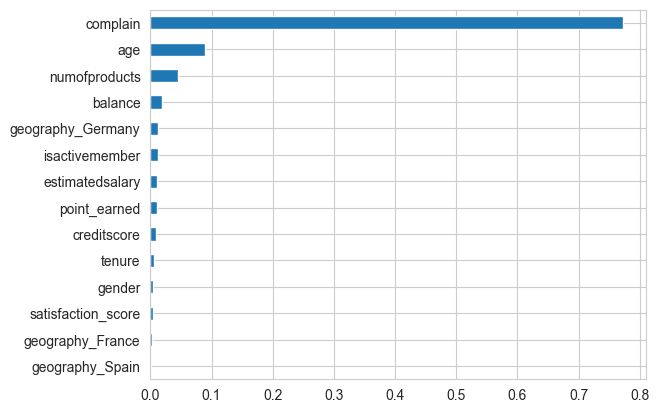

In [83]:
featureimps.plot(kind = 'barh')

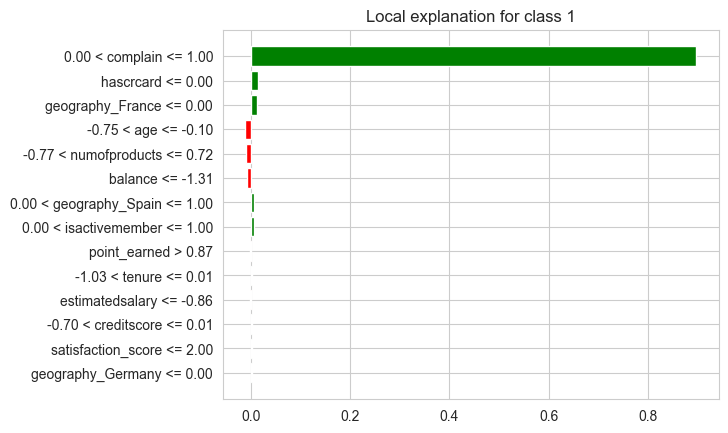

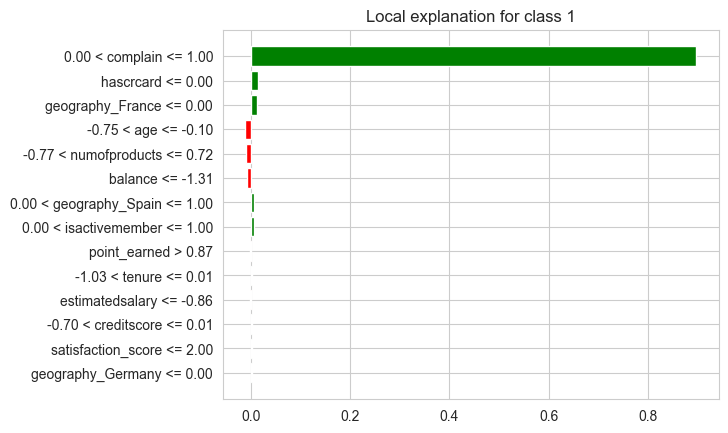

In [133]:
exp.as_pyplot_figure()

# Explaining Features with SHAP values
---

In [88]:
import shap

In [134]:
explainer = shap.TreeExplainer(final_model)

In [141]:
shap_values = explainer.shap_values(X_test)


(2, 2407, 14)

In [142]:
np.shape(shap_values)

(2, 2407, 14)

In [143]:
shap_values

[array([[ 0.00626873, -0.07413386,  0.00108604, ...,  0.00138281,
         -0.00113469, -0.00790428],
        [ 0.00390258,  0.05564886, -0.00029577, ...,  0.00780804,
          0.00151983,  0.00782343],
        [ 0.00147673,  0.05216157,  0.00195881, ...,  0.01159792,
         -0.00066764,  0.00716818],
        ...,
        [ 0.00332858,  0.03591246,  0.0022935 , ...,  0.01470314,
         -0.00062857, -0.00670279],
        [-0.00526766,  0.04518391, -0.00055697, ...,  0.01106745,
         -0.00042463, -0.00946424],
        [ 0.00917571, -0.01288519,  0.00665108, ..., -0.01901631,
         -0.00163088, -0.00501717]]),
 array([[-0.00626873,  0.07413386, -0.00108604, ..., -0.00138281,
          0.00113469,  0.00790428],
        [-0.00390258, -0.05564886,  0.00029577, ..., -0.00780804,
         -0.00151983, -0.00782343],
        [-0.00147673, -0.05216157, -0.00195881, ..., -0.01159792,
          0.00066764, -0.00716818],
        ...,
        [-0.00332858, -0.03591246, -0.0022935 , ..., -

### SHAP Summary plot
---
The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance.

The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high.

Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

Source: https://christophm.github.io/interpretable-ml-book/shap.html

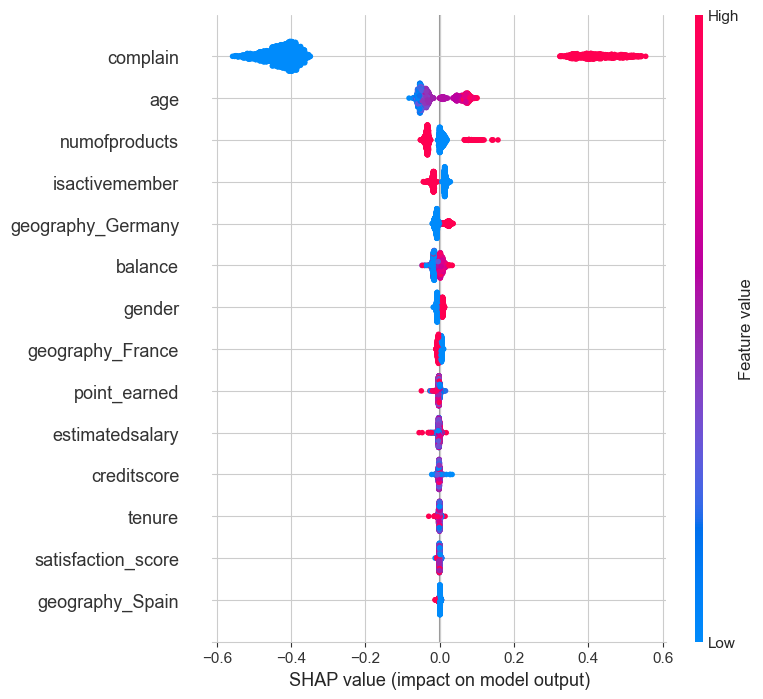

In [144]:
shap.summary_plot(shap_values[1] , X_test)

- This figure show the importance features by ordering them from top to bottom.

- As we can see, the feature, complain, is on the top of the figure meaning that the complaining of customers contributes the highest prediction power towards the probability of churn.

- If a customer complains, there is a very high chance that they will churn and vice versa.

- In terms of age, the older the customers the higher chance they will churn.

- If the customer is not an active member, they are more likely to churn.

- Interestingly, being a german contributes to the probability to churn. However, the effect is minute.

- In summary, complain is the biggest factor that causes customer to churn and we might say that the customer who possesses the following traits: complains, old age, and is not an active member is more likely to churn.